In [615]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# Data Preparation:

In [617]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

# Exploratory Data Analysis (EDA):

In [619]:
df.shape

(908, 13)

In [620]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [621]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [622]:
df.duplicated().sum()

1

In [623]:
df.drop_duplicates(inplace=True)

In [624]:
df.reset_index(drop=True, inplace=True)

In [625]:
df.duplicated().sum()

0

In [626]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

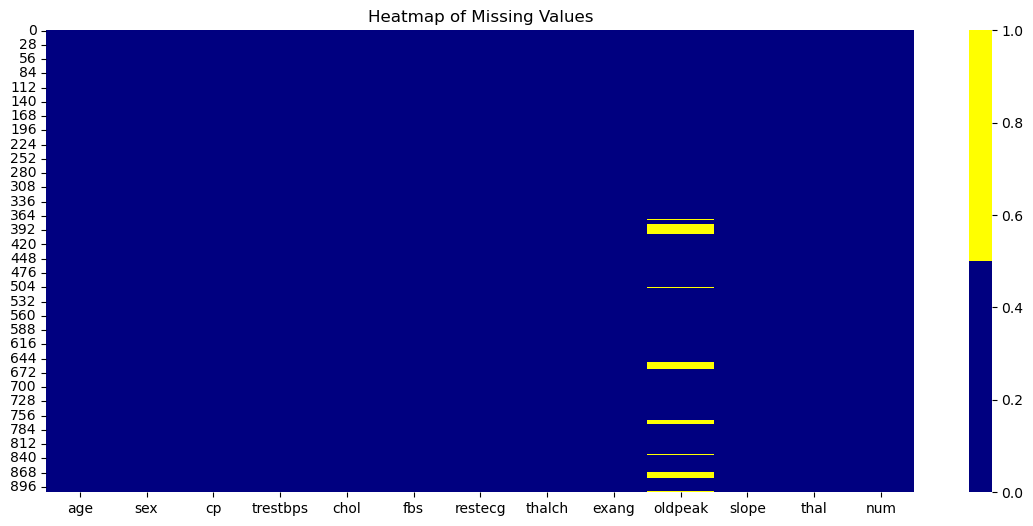

In [627]:
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours)
plt.title('Heatmap of Missing Values')
plt.show()

In [628]:
df['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [629]:
df[df['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
877,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
878,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [630]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [631]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [632]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [633]:
df['exang'].value_counts()

exang
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [634]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [635]:
df['exang'] = df['exang'].map({'FALSE' : False, 'TURE' : True})

In [636]:
df['exang'] = df['exang'].astype(bool)

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    bool   
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.8+ KB


In [638]:
for col in df:
    print({col:df[col].nunique()})

{'age': 49}
{'sex': 2}
{'cp': 4}
{'trestbps': 85}
{'chol': 228}
{'fbs': 2}
{'restecg': 3}
{'thalch': 122}
{'exang': 2}
{'oldpeak': 53}
{'slope': 3}
{'thal': 3}
{'num': 5}


In [639]:
for col in df:
    if df[col].nunique() <= 5:
        print({col:df[col].unique()})

{'sex': array(['Male', 'Female'], dtype=object)}
{'cp': array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)}
{'fbs': array([ True, False])}
{'restecg': array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)}
{'exang': array([ True, False])}
{'slope': array(['downsloping', 'flat', 'upsloping'], dtype=object)}
{'thal': array(['fixed defect', 'normal', 'reversable defect'], dtype=object)}
{'num': array([0, 1, 2, 3, 4], dtype=int64)}


In [640]:
for col in df:
    print({col:df[col].unique()})

{'age': array([63, 41, 57, 52, 66, 56, 48, 53, 30, 54, 37, 46, 68, 76, 58, 42, 64,
       71, 69, 45, 44, 39, 62, 50, 55, 49, 43, 51, 36, 59, 61, 60, 67, 70,
       47, 65, 38, 34, 35, 29, 74, 75, 40, 72, 31, 73, 33, 32, 77],
      dtype=int64)}
{'sex': array(['Male', 'Female'], dtype=object)}
{'cp': array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)}
{'trestbps': array([145, 135, 140, 118, 110, 160, 130, 155, 170, 150, 125, 120, 142,
       100, 102, 112, 146, 138, 134, 122, 136, 108, 115, 104, 128, 106,
       156, 129, 124, 126, 132, 105, 152, 148,  94, 180, 178, 101, 172,
        80, 114, 190, 113, 154, 175, 133, 131, 181, 188, 193, 153, 179,
       143,  90,  96, 163, 161, 196, 107, 167, 174, 158, 192, 185, 144,
       169,  95,  92, 200, 127, 121, 166, 177, 165, 117, 116, 184,  97,
       186, 164, 123, 151,   0, 137, 182], dtype=int64)}
{'chol': array([233, 203, 192, 186, 201, 228, 276, 211, 260, 175, 237, 226, 273,
       197, 240, 2

In [641]:
for col in df:
    print(df[col].value_counts())

age
54    51
58    42
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: count, dtype: int64
sex
Male      717
Female    190
Name: count, dtype: int64
cp
asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: count, dtype: int64
trestbps
120    128
130    114
140    100
110     58
150     54
      ... 
163      1
107      1
174      1
185      1
182      1
Name: count, Length: 85, dtype: int64
chol
0      172
230      9
211      9
223      9
254      9
      ... 
165      1
161      1
139      1
385      1
109      1
Name: count, Length: 228, dtype: int64
fbs
False    722


In [642]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.865491,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.060629,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [643]:
df.describe(include=object)

,sex,cp,restecg,slope,thal
count,907,907,907,907,907
unique,2,4,3,3,3
top,Male,asymptomatic,normal,flat,normal
freq,717,495,542,453,385


In [644]:
df.describe(include=bool)

,fbs,exang
count,907,907
unique,2,2
top,False,True
freq,722,888


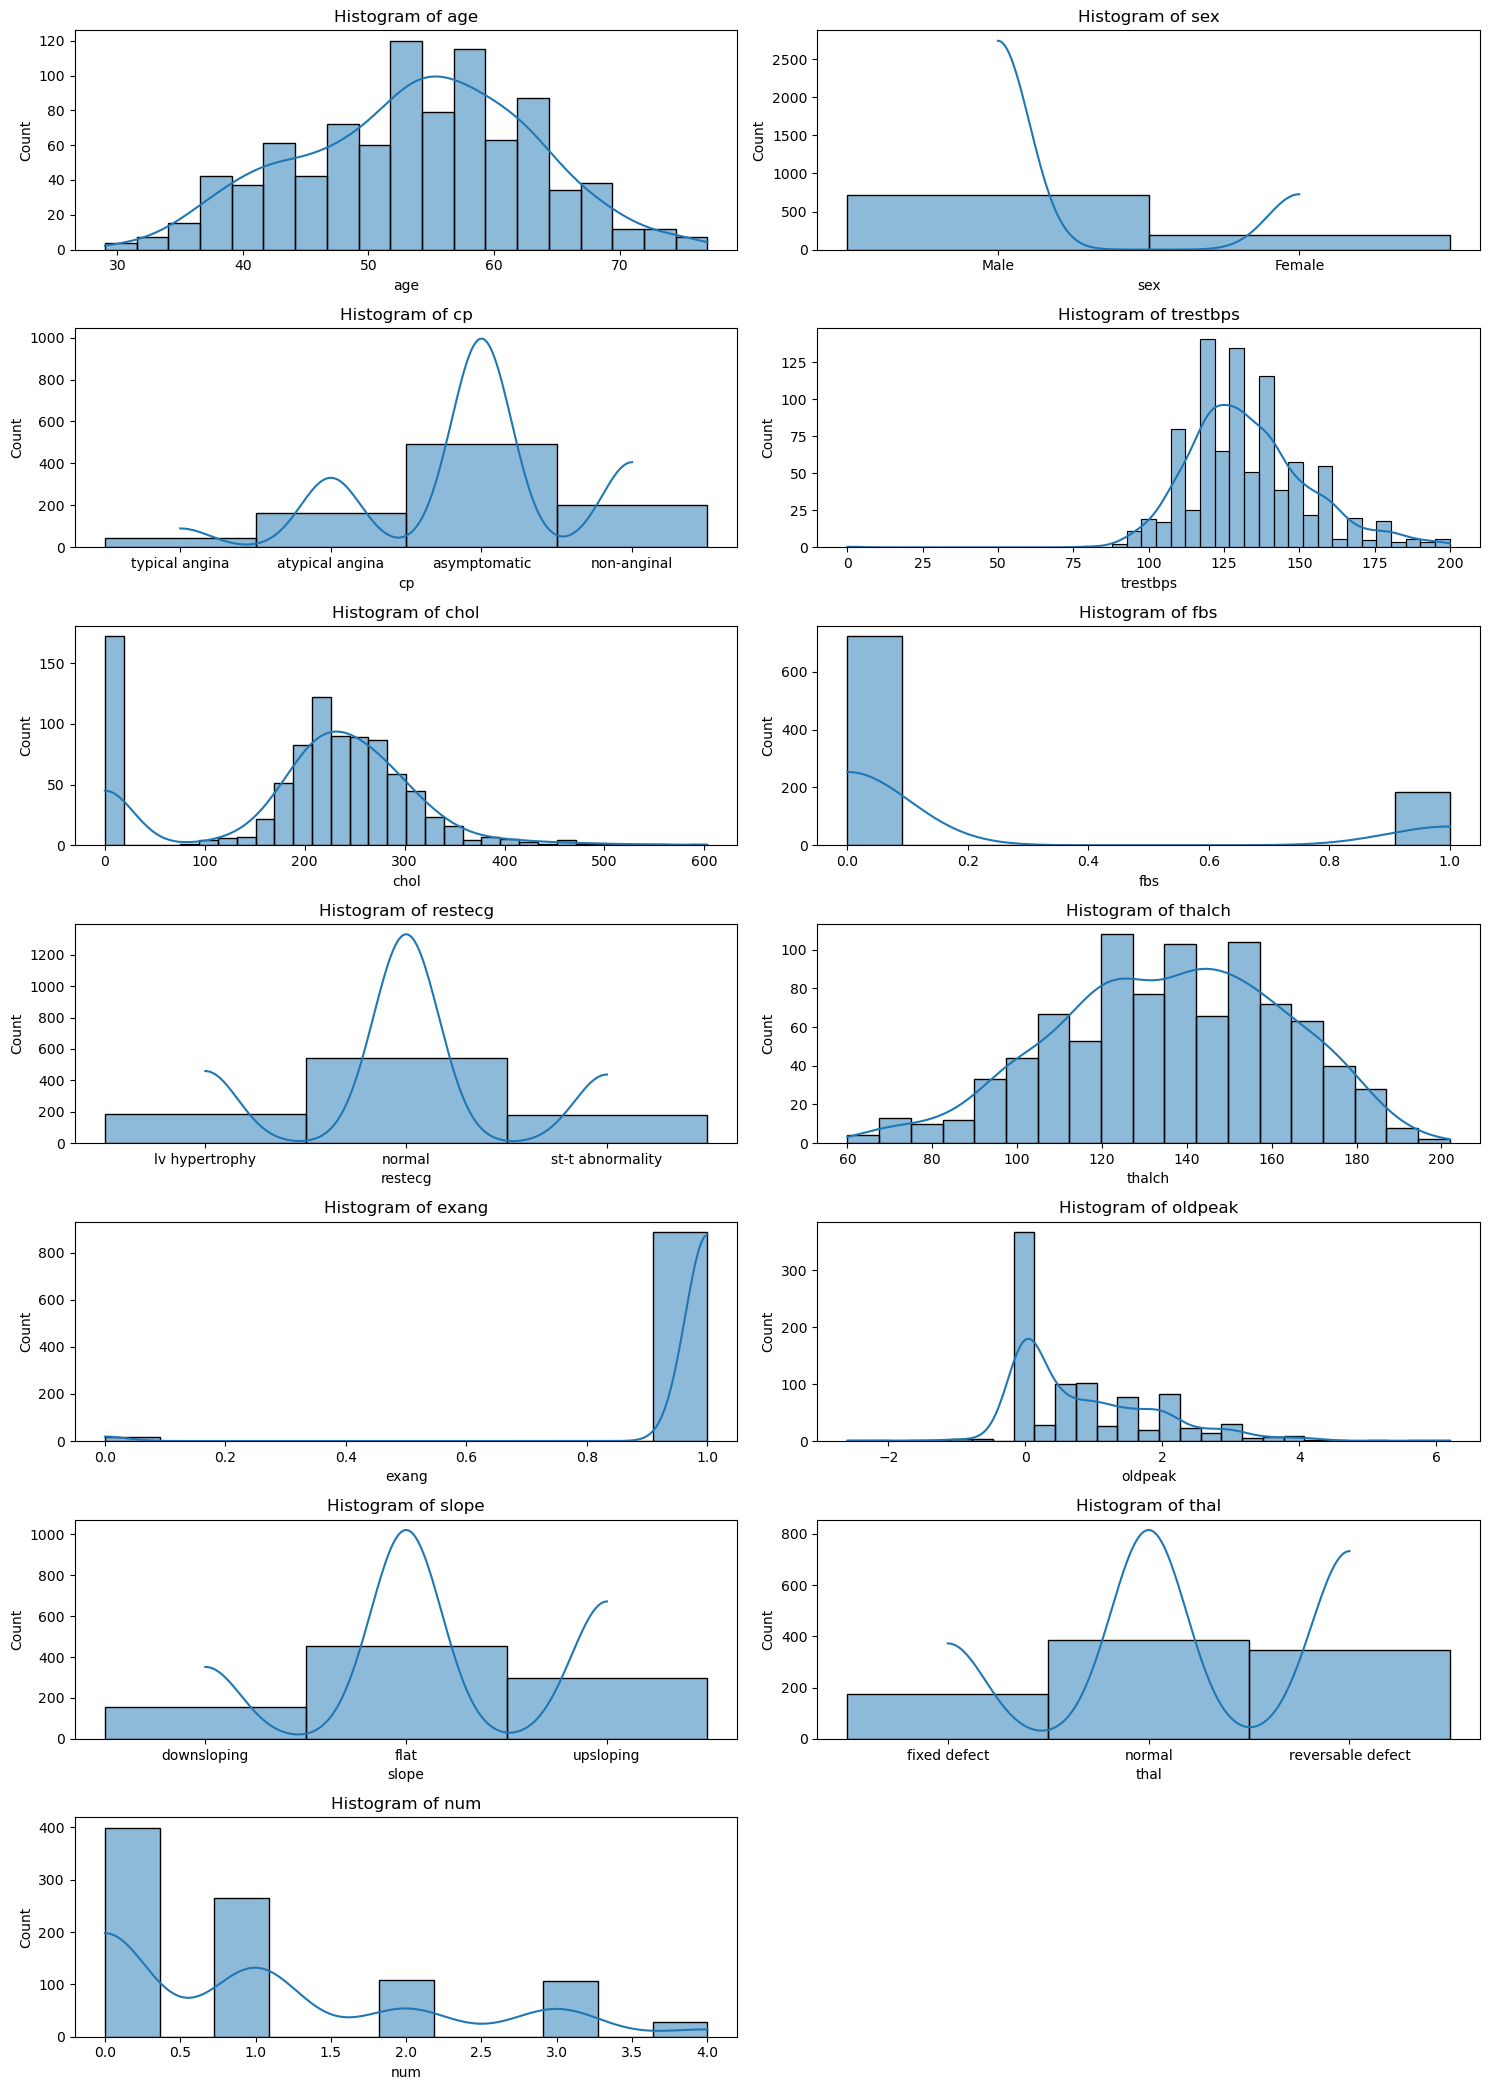

In [645]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

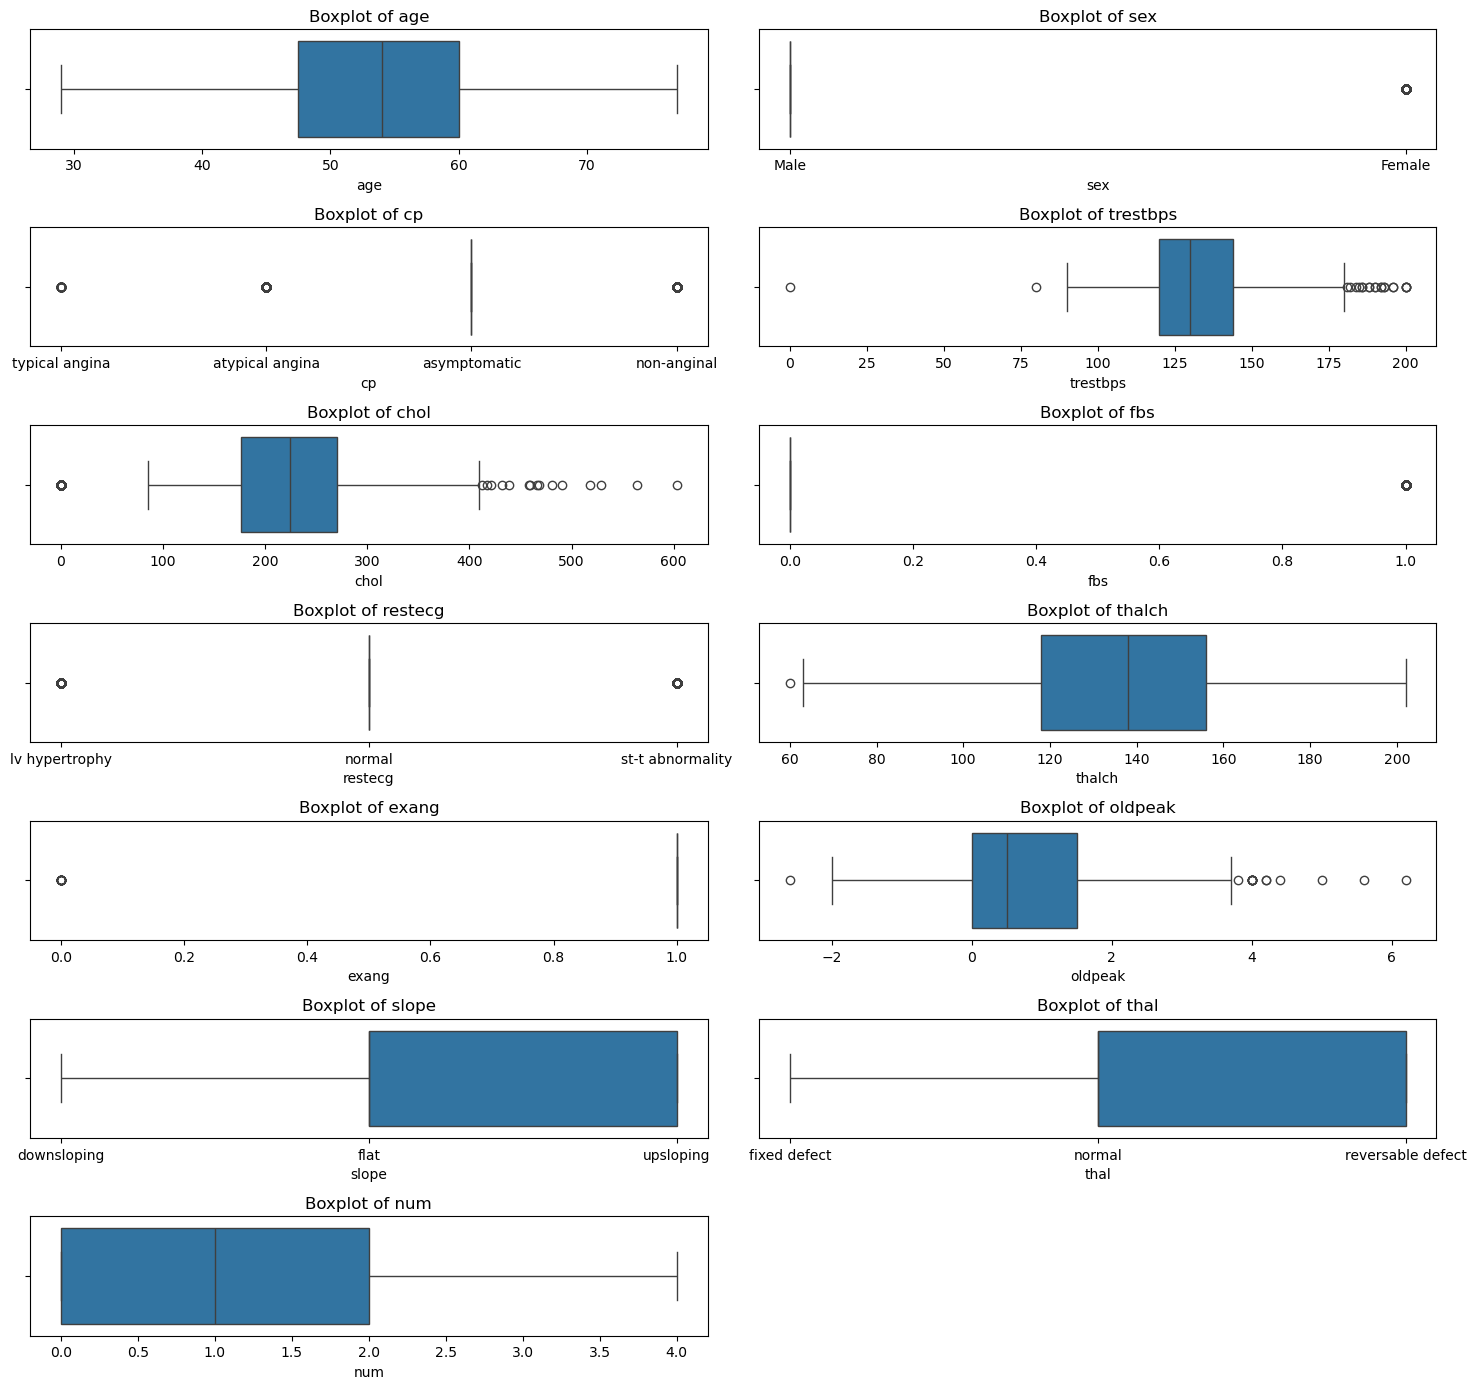

In [646]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [647]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.253709,-0.100059,0.177004,-0.327868,-0.083270,0.218461,0.326227
trestbps,0.253709,1.000000,0.117392,0.112124,-0.132841,-0.132185,0.135775,0.136581
chol,-0.100059,0.117392,1.000000,-0.113651,0.198074,0.002255,0.032357,-0.239065
fbs,0.177004,0.112124,-0.113651,1.000000,-0.065827,-0.040592,0.007703,0.156839
thalch,-0.327868,-0.132841,0.198074,-0.065827,1.000000,0.040380,-0.113296,-0.322632
exang,-0.083270,-0.132185,0.002255,-0.040592,0.040380,1.000000,0.039540,-0.052852
oldpeak,0.218461,0.135775,0.032357,0.007703,-0.113296,0.039540,1.000000,0.407175
num,0.326227,0.136581,-0.239065,0.156839,-0.322632,-0.052852,0.407175,1.000000


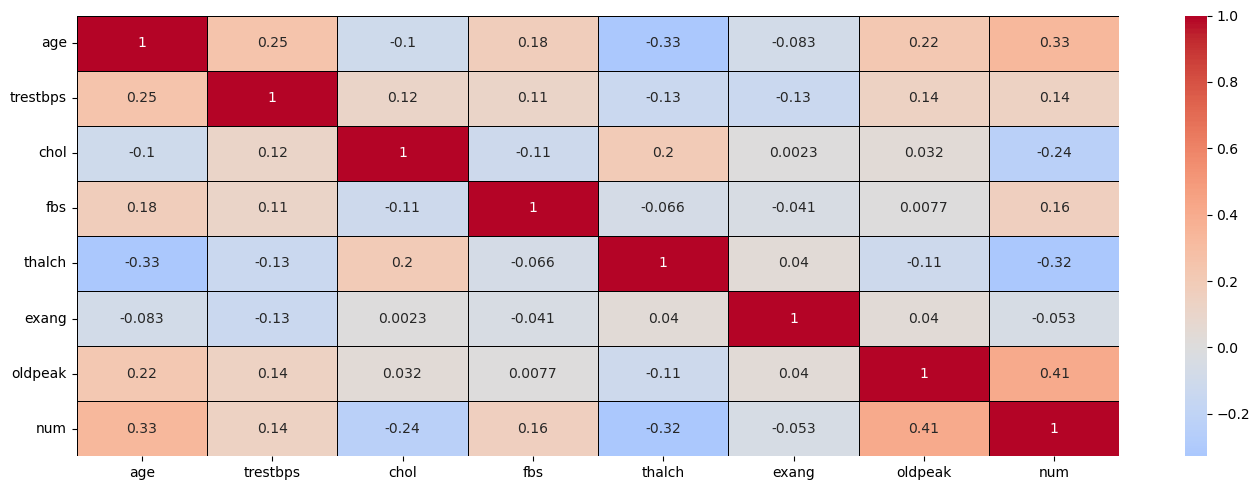

In [648]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.show()

# Feature Engineering:

In [650]:
df.select_dtypes(include=['object','boolean']).columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [651]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object','boolean']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int32  
 2   cp        907 non-null    int32  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int32  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int32  
 11  thal      907 non-null    int32  
 12  num       907 non-null    int64  
dtypes: float64(1), int32(5), int64(7)
memory usage: 74.5 KB


# Decision Tree Classification:

In [654]:
X = df.drop('num', axis=1)
y = df['num']

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [656]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [657]:
clf = DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [658]:
y_pred = clf.predict(X_test)

In [659]:
clf.score(X_test, y_test)

0.41208791208791207

In [660]:
clf.score(X_train_res, y_train_res)

1.0

In [661]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.56      0.62        80
           1       0.46      0.47      0.47        53
           2       0.05      0.05      0.05        22
           3       0.12      0.19      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.41       182
   macro avg       0.26      0.25      0.26       182
weighted avg       0.45      0.41      0.43       182



In [662]:
### k-fold cross validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(clf, X_train_res, y_train_res, cv=5)
results

array([0.59247649, 0.67084639, 0.69905956, 0.70532915, 0.72413793])

# Hyperparameter Tuning:

In [664]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [665]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 4, 5, 6],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 15, 20],
    'max_leaf_nodes': [None, 10, 20, 30, 50],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

In [666]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)

In [667]:
# Fit GridSearchCV
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6],
                         'max_leaf_nodes': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [20, 30, 40]},
             scoring='accuracy', verbose=2)

In [668]:
# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'min_samples_split': 20}
Best Cross-Validation Score: 0.60


In [669]:
# Train the best estimator with the training data
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=10,
                       min_samples_split=20)

# Model Evaluation and Analysis:

In [671]:
# Predict the labels
y_pred = best_clf.predict(X_test)

In [672]:
best_clf.score(X_train_res, y_train_res)

0.6702194357366771

In [673]:
best_clf.score(X_test, y_test)

0.46153846153846156

In [674]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75        80
           1       0.45      0.32      0.37        53
           2       0.16      0.18      0.17        22
           3       0.16      0.24      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.31      0.29      0.30       182
weighted avg       0.51      0.46      0.48       182



[Text(0.3843201754385965, 0.9583333333333334, 'oldpeak <= 0.001\ngini = 0.8\nsamples = 1595\nvalue = [319, 319, 319, 319, 319]'),
 Text(0.13157894736842105, 0.875, 'chol <= 42.5\ngini = 0.642\nsamples = 362\nvalue = [190.0, 79.0, 61.0, 30.0, 2.0]'),
 Text(0.07017543859649122, 0.7916666666666666, 'thalch <= 103.5\ngini = 0.679\nsamples = 91\nvalue = [7, 21, 42, 20, 1]'),
 Text(0.03508771929824561, 0.7083333333333334, 'thal <= 0.5\ngini = 0.519\nsamples = 46\nvalue = [1, 4, 30, 10, 1]'),
 Text(0.017543859649122806, 0.625, 'gini = 0.446\nsamples = 11\nvalue = [0, 1, 1, 8, 1]'),
 Text(0.05263157894736842, 0.625, 'gini = 0.302\nsamples = 35\nvalue = [1.0, 3.0, 29.0, 2.0, 0.0]'),
 Text(0.10526315789473684, 0.7083333333333334, 'thalch <= 113.0\ngini = 0.719\nsamples = 45\nvalue = [6, 17, 12, 10, 0]'),
 Text(0.08771929824561403, 0.625, 'gini = 0.544\nsamples = 13\nvalue = [2, 3, 0, 8, 0]'),
 Text(0.12280701754385964, 0.625, 'gini = 0.648\nsamples = 32\nvalue = [4, 14, 12, 2, 0]'),
 Text(0.1929

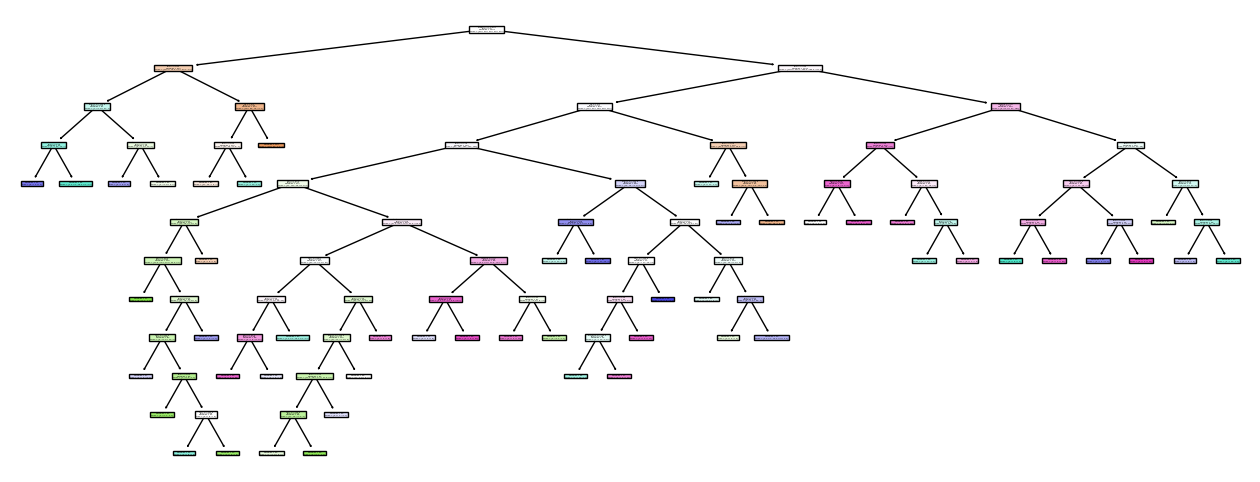

In [675]:
plt.figure(figsize=(16,6))
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(best_clf, filled=True, feature_names=X.columns)

In [750]:
text = tree.export_text(best_clf,max_depth=7, feature_names=X.columns)
print(text)

|--- oldpeak <= 0.00
|   |--- chol <= 42.50
|   |   |--- thalch <= 103.50
|   |   |   |--- thal <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- thal >  0.50
|   |   |   |   |--- class: 2
|   |   |--- thalch >  103.50
|   |   |   |--- thalch <= 113.00
|   |   |   |   |--- class: 3
|   |   |   |--- thalch >  113.00
|   |   |   |   |--- class: 1
|   |--- chol >  42.50
|   |   |--- cp <= 0.50
|   |   |   |--- fbs <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- fbs >  0.50
|   |   |   |   |--- class: 2
|   |   |--- cp >  0.50
|   |   |   |--- class: 0
|--- oldpeak >  0.00
|   |--- oldpeak <= 2.00
|   |   |--- cp <= 1.50
|   |   |   |--- age <= 58.50
|   |   |   |   |--- age <= 50.50
|   |   |   |   |   |--- thalch <= 159.50
|   |   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |   |--- thalch <= 145.50
|   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   

In [752]:
best_clf.feature_importances_

array([0.12412771, 0.        , 0.07411152, 0.06357331, 0.24738925,
       0.01578139, 0.06820678, 0.12925629, 0.        , 0.21307779,
       0.04908863, 0.01538732])

In [754]:
feature_imp = pd.Series(best_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

chol        0.247389
oldpeak     0.213078
thalch      0.129256
age         0.124128
cp          0.074112
restecg     0.068207
trestbps    0.063573
slope       0.049089
fbs         0.015781
thal        0.015387
sex         0.000000
exang       0.000000
dtype: float64

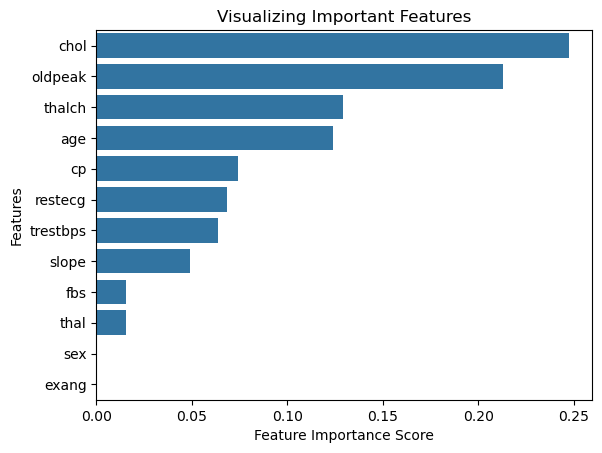

In [756]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [758]:
preds = best_clf.predict(X_test)
pd.Series(preds).value_counts()

0    75
1    38
3    32
2    25
4    12
Name: count, dtype: int64

In [760]:
preds

array([0, 1, 1, 3, 1, 3, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0,
       3, 3, 0, 0, 0, 4, 1, 1, 0, 4, 2, 3, 0, 4, 2, 3, 0, 2, 0, 1, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 3, 1, 0, 3, 0, 1, 0, 3,
       2, 0, 2, 4, 3, 3, 3, 0, 4, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 3,
       3, 2, 0, 3, 3, 2, 2, 0, 1, 2, 0, 2, 1, 0, 4, 3, 0, 0, 0, 2, 1, 3,
       3, 0, 2, 0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 4,
       1, 3, 1, 0, 4, 1, 0, 1, 2, 2, 0, 3, 2, 0, 1, 0, 3, 0, 1, 0, 4, 0,
       3, 3, 2, 2, 0, 0, 1, 0, 3, 0, 0, 0, 3, 2, 1, 2, 1, 1, 0, 3, 0, 3,
       1, 0, 0, 0, 0, 4], dtype=int64)

In [762]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4
num,,,,,
0,58,7,5,9,1
1,11,17,11,9,5
2,3,9,4,5,1
3,3,4,4,5,5
4,0,1,1,4,0


In [764]:
np.mean(preds==y_test)

0.46153846153846156